In [10]:
import numpy as np

def check_weights_for_non_negativity(weights):
    """
    Checks if all elements in the weights array are non-negative.

    Parameters:
    - weights: An array containing weights.

    Returns:
    - bool: True if all weights are non-negative, False otherwise.
    """
    return all(weight >= 0 for weight in weights)

def normalize_weights(weights):
    """
    Normalizes the weights array such that the sum of weights equals 1.

    Parameters:
    - weights: An array containing weights.

    Returns:
    - list: A list of normalized weights.
    """
    if not check_weights_for_non_negativity(weights):
        raise ValueError("Weights must be non-negative.")
    total_weight = sum(weights)
    normalized_weights = [weight / total_weight for weight in weights]
    return normalized_weights

def compute_weighted_mean(data, weights=None):
    """
    Parameters:
    - data: An array containing data points.
    - weights: An array containing weights.
        If None, equal weights are assigned.
        
    Returns:
    - float: Weighted mean of the data.
    """
    if weights is None:
        weights = np.ones(len(data))
    else:
        if len(data) != len(weights):
            raise ValueError("Length of weights must be equal to length of data.")
        weights = normalize_weights(weights)
    weighted_mean = np.sum(data * weights)
    return weighted_mean

def compute_weighted_std(data, weights=None, mean=None):
    """
    Parameters:
    - data: An array.
    - weights: An array containing weights.
        If None, equal weights are assigned.
    - mean: Mean of the data. 
    
    Returns:
    - float: Weighted standard deviation of the data.
    """
    if weights is None:
        weights = np.ones(len(data))
    else:
        if len(data) != len(weights):
            raise ValueError("Length of weights must be equal to length of data.")
        weights = normalize_weights(weights)
    if mean is None:
        mean = compute_weighted_mean(data, weights)
    else:
        if len(data) != len(mean):
            raise ValueError("Length of mean must be equal to length of data.")
    weighted_variance = np.sum(weights * (data - mean)**2)
    weighted_std = np.sqrt(weighted_variance)
    return weighted_std

x = np.random.randn(100)
weights = np.random.exponential(1, 100)

numpy_weighted_mean = np.average(x, weights=weights)
numpy_weighted_std = np.sqrt(np.average((x - numpy_weighted_mean)**2, weights=weights))

print("Custom Weighted Mean:", compute_weighted_mean(x, weights))
print("NumPy Weighted Mean:", numpy_weighted_mean)
print("Custom Weighted Std:", compute_weighted_std(x, weights))
print("NumPy Weighted Std:", numpy_weighted_std)


Custom Weighted Mean: 0.0058208896207688834
NumPy Weighted Mean: 0.005820889620768804
Custom Weighted Std: 1.026104398335031
NumPy Weighted Std: 1.026104398335031


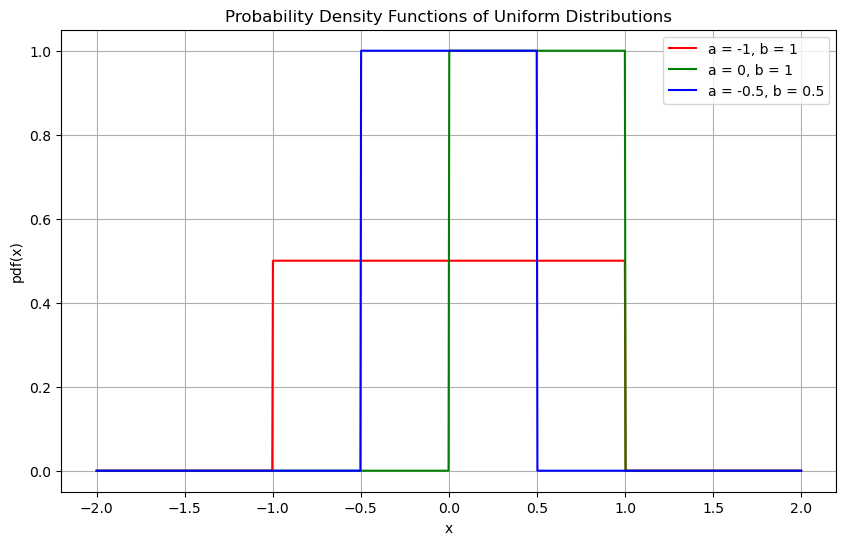

In [11]:
import matplotlib.pyplot as plt

parameters = [(-1, 1), (0, 1), (-0.5, 0.5)]
colors = ['r', 'g', 'b']
labels = ['a = -1, b = 1', 'a = 0, b = 1', 'a = -0.5, b = 0.5']

x = np.linspace(-2, 2, 1000)

plt.figure(figsize=(10, 6))
for i, (a, b) in enumerate(parameters):
    pdf = np.where((x >= a) & (x <= b), 1/(b-a), 0)
    plt.plot(x, pdf, color=colors[i], label=labels[i])

plt.title('Probability Density Functions of Uniform Distributions')
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.legend()
plt.grid(True)
plt.show()

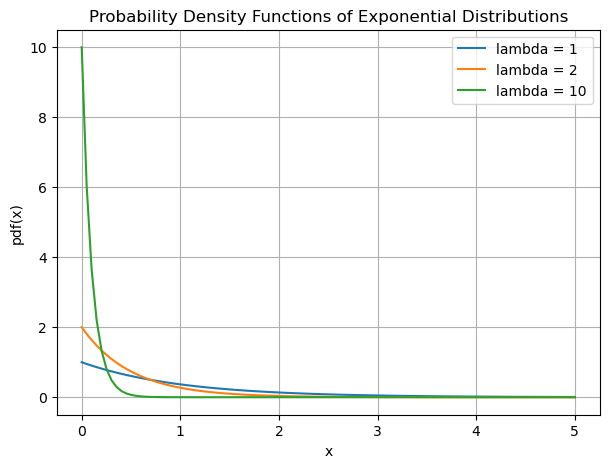

In [13]:
# 4.3

x = np.linspace(0,5,100)
lambdas = [1,2,10]

plt.figure(figsize=(7,5))
for lam in lambdas:
    pdf = lam * np.exp(-lam*x)
    plt.plot(x,pdf,label=f'lambda = {lam}')
    
plt.title('Probability Density Functions of Exponential Distributions')
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.legend()
plt.grid(True)
plt.show();